#AMS-572 Team Project

##Most Streamed Spotify Songs 2023

###1. Sagari Chandrashekar
###2. Sri Datta Y
###3. Aditi Badhe
###4. Moni Gayatri Sayana



###README: If using colab go to Runtime and click change run time type and set R and then upload spotify-2023.csv file and then run the steps to get the desired results.
#####THANK YOU

##STEP 1: DATA LOADING AND UNDERSTANDING

INSTALLING ALL THE REQUIRED PACKAGES FOR THE PROJECT

In [103]:
install.packages("readr")
install.packages("moments")
install.packages("dplyr")
install.packages("naniar")
library(readr)
library(MASS)
library(moments)
library(dplyr)
library(naniar)
library(stats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading and skimming the data

In [113]:
options(max.print = 1000)
spotify_data <- read_csv('spotify-2023.csv', show_col_types=FALSE)
head(spotify_data)

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,⋯,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,⋯,144,A,Minor,65,23,80,14,63,11,6
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,141,C#,Major,92,66,58,19,0,8,24


Summary and the shape of the data

In [114]:
cat('dataframe shape: ', dim(spotify_data), '\n')
cat('column data types:\n')
str(spotify_data)
summary(spotify_data)

dataframe shape:  953 24 
column data types:
spc_tbl_ [953 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ track_name          : chr [1:953] "Seven (feat. Latto) (Explicit Ver.)" "LALA" "vampire" "Cruel Summer" ...
 $ artist(s)_name      : chr [1:953] "Latto, Jung Kook" "Myke Towers" "Olivia Rodrigo" "Taylor Swift" ...
 $ artist_count        : num [1:953] 2 1 1 1 1 2 2 1 1 2 ...
 $ released_year       : num [1:953] 2023 2023 2023 2019 2023 ...
 $ released_month      : num [1:953] 7 3 6 8 5 6 3 7 5 3 ...
 $ released_day        : num [1:953] 14 23 30 23 18 1 16 7 15 17 ...
 $ in_spotify_playlists: num [1:953] 553 1474 1397 7858 3133 ...
 $ in_spotify_charts   : num [1:953] 147 48 113 100 50 91 50 43 83 44 ...
 $ streams             : chr [1:953] "141381703" "133716286" "140003974" "800840817" ...
 $ in_apple_playlists  : num [1:953] 43 48 94 116 84 67 34 25 60 49 ...
 $ in_apple_charts     : num [1:953] 263 126 207 207 133 213 222 89 210 110 ...
 $ in_deezer_playlists : num [1:953] 45 5

  track_name        artist(s)_name      artist_count   released_year 
 Length:953         Length:953         Min.   :1.000   Min.   :1930  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:2020  
 Mode  :character   Mode  :character   Median :1.000   Median :2022  
                                       Mean   :1.556   Mean   :2018  
                                       3rd Qu.:2.000   3rd Qu.:2022  
                                       Max.   :8.000   Max.   :2023  
                                                                     
 released_month    released_day   in_spotify_playlists in_spotify_charts
 Min.   : 1.000   Min.   : 1.00   Min.   :   31        Min.   :  0.00   
 1st Qu.: 3.000   1st Qu.: 6.00   1st Qu.:  875        1st Qu.:  0.00   
 Median : 6.000   Median :13.00   Median : 2224        Median :  3.00   
 Mean   : 6.034   Mean   :13.93   Mean   : 5200        Mean   : 12.01   
 3rd Qu.: 9.000   3rd Qu.:22.00   3rd Qu.: 5542        3rd Qu.: 16.00   
 M

Streams: Continuous variable representing the total stream count; ensure conversion from character to numeric for accurate analysis.

Musical Attributes (Danceability, Valence, Energy, Acousticness, Instrumentalness, Liveness, Speechiness): Continuous variables typically on a scale from 0 to 1, representing different dimensions of the music; they are continuous but within a fixed range, which may influence their statistical behavior.continuous in some types of analyses, but they are fundamentally discrete as they represent distinct, countable units.

Checking for missing values and changing the naming convention

In [115]:
cat('Missing values in each column:\n')
colSums(is.na(spotify_data))
names(spotify_data) <- gsub("%", "", names(spotify_data))

Missing values in each column:


track_name       artist(s)_name         artist_count 
                   0                    0                    0 
       released_year       released_month         released_day 
                   0                    0                    0 
in_spotify_playlists    in_spotify_charts              streams 
                   0                    0                    0 
  in_apple_playlists      in_apple_charts  in_deezer_playlists 
                   0                    0                    0 
    in_deezer_charts     in_shazam_charts                  bpm 
                   0                   50                    0 
                 key                 mode       danceability_% 
                  95                    0                    0 
           valence_%             energy_%       acousticness_% 
                   0                    0                    0 
  instrumentalness_%           liveness_%        speechiness_% 
                   0                    0                    0

Measuirng the Skewness

In [116]:
skewness_bpm <- skewness(spotify_data$bpm)
skewness_danceability <- skewness(spotify_data$danceability_)
skewness_valence <- skewness(spotify_data$valence_)
skewness_energy <- skewness(spotify_data$energy_)
skewness_acousticness <- skewness(spotify_data$acousticness_)
skewness_instrumentalness <- skewness(spotify_data$instrumentalness_)
skewness_liveness <- skewness(spotify_data$liveness_)
skewness_speechiness <- skewness(spotify_data$speechiness_)

print(paste("Skewness of BPM:", skewness_bpm))
print(paste("Skewness of Danceability:", skewness_danceability))
print(paste("Skewness of Valence:", skewness_valence))
print(paste("Skewness of Energy:", skewness_energy))
print(paste("Skewness of Acousticness:", skewness_acousticness))
print(paste("Skewness of Instrumentalness:", skewness_instrumentalness))
print(paste("Skewness of Liveness:", skewness_liveness))
print(paste("Skewness of Speechiness:", skewness_speechiness))

[1] "Skewness of BPM: 0.412594824509775"
[1] "Skewness of Danceability: -0.435191771397039"
[1] "Skewness of Valence: 0.00821058753712152"
[1] "Skewness of Energy: -0.445696288721271"
[1] "Skewness of Acousticness: 0.950961889108647"
[1] "Skewness of Instrumentalness: 7.11299898856884"
[1] "Skewness of Liveness: 2.10096650815347"
[1] "Skewness of Speechiness: 1.93162188752986"


Reducing the Skewness using BoxCox

In [117]:
apply_boxcox_and_get_skewness <- function(spotify_data, variable) {
  y <- spotify_data[[variable]] + abs(min(spotify_data[[variable]], na.rm = TRUE)) + 1
  transformed <- boxcox(y ~ 1, plotit = FALSE)$y
  return(skewness(transformed))
}

original_skewness <- lapply(spotify_data[c( "bpm", "danceability_", "valence_",
                                   "energy_", "acousticness_", "instrumentalness_",
                                   "liveness_", "speechiness_")], skewness)

transformed_skewness <- sapply(c( "bpm", "danceability_", "valence_",
                                  "energy_", "acousticness_", "instrumentalness_",
                                  "liveness_", "speechiness_"),
                               function(x) apply_boxcox_and_get_skewness(spotify_data, x))


comparison <- data.frame(Original = unlist(original_skewness),
                         Transformed = unlist(transformed_skewness))
print(comparison)


                      Original Transformed
bpm                0.412594825  -1.0614214
danceability_     -0.435191771  -0.7280523
valence_           0.008210588  -1.2262866
energy_           -0.445696289  -0.9780762
acousticness_      0.950961889  -1.0395375
instrumentalness_  7.112998989  -0.8448425
liveness_          2.100966508  -1.2311982
speechiness_       1.931621888  -1.0385376


##STEP 2: DATA PRE-PROCESSING

Adding this variable for the First Hypothesis before transforming other variables

In [118]:
#Creating a column named released half for the first hypothesis
spotify_data$release_half <- ifelse(spotify_data$released_month <= 6, "First Half", "Second Half")

In [119]:
# Combine 'released_year', 'released_month', 'released_day' into 'released_date'
spotify_data$released_date <- as.Date(paste(spotify_data$released_year,
                                            spotify_data$released_month,
                                            spotify_data$released_day,
                                            sep="-"),
                                      format="%Y-%m-%d")

In [120]:
 #Dropping release_month and release_day
 spotify_data <- spotify_data %>%
  dplyr::select(-released_month, -released_day)


In [121]:
#Changing into numeric for date
spotify_data$released_date <- as.numeric(difftime(spotify_data$released_date,
                                                  min(spotify_data$released_date),
                                                  units="days"))

One Hot Encoding

In [122]:
#One hot encoding
mode_dummies <- model.matrix(~spotify_data$mode - 1)
mode_dummies <- as.data.frame(mode_dummies)
colnames(mode_dummies) <- paste("mode", colnames(mode_dummies), sep="_")
spotify_data <- cbind(spotify_data, mode_dummies)

In [123]:
#Dropping node
spotify_data <- spotify_data[, !(names(spotify_data) %in% "mode")]

In [79]:
colnames(spotify_data)

[1] "track_name"                  "artist(s)_name"             
 [3] "artist_count"                "released_year"              
 [5] "in_spotify_playlists"        "in_spotify_charts"          
 [7] "streams"                     "in_apple_playlists"         
 [9] "in_apple_charts"             "in_deezer_playlists"        
[11] "in_deezer_charts"            "in_shazam_charts"           
[13] "bpm"                         "key"                        
[15] "danceability_"               "valence_"                   
[17] "energy_"                     "acousticness_"              
[19] "instrumentalness_"           "liveness_"                  
[21] "speechiness_"                "release_half"               
[23] "released_date"               "mode_spotify_data$modeMajor"
[25] "mode_spotify_data$modeMinor"

In [124]:
#pre processing based on max values and convering into numerical
spotify_data$in_shazam_charts <- as.numeric(gsub(",", "", spotify_data$in_shazam_charts))
max_value <- max(spotify_data$in_shazam_charts, na.rm = TRUE)
spotify_data$in_shazam_charts[is.na(spotify_data$in_shazam_charts)] <- max_value + 1

In [125]:
# Replacing null values in 'key' column with -1
spotify_data$key[is.na(spotify_data$key)] <- -1

# Replacing invalid data in the 'streams' column with NA
spotify_data$streams <- as.numeric(spotify_data$streams)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [126]:
# Transfering keys into numeric datatype
key_num <- c('C' = 0, 'C#' = 1, 'D' = 2, 'D#' = 3, 'E' = 4, 'F' = 5, 'F#' = 6,
             'G' = 7, 'G#' = 8, 'A' = 9, 'A#' = 10, 'B' = 11)

spotify_data$key <- ifelse(spotify_data$key %in% names(key_num), key_num[spotify_data$key], -1)

In [127]:
#Convering into integer
spotify_data$in_deezer_playlists <- as.integer(gsub(",", "", spotify_data$in_deezer_playlists))
spotify_data$in_shazam_charts <- as.integer(gsub(",", "", spotify_data$in_shazam_charts))

In [128]:
# Dropping rows with missing values in 'streams' column
spotify_data <- spotify_data[!is.na(spotify_data$streams), ]

In [129]:
# Checking for missing values again
cat('Missing values in each column:\n')
colSums(is.na(spotify_data))

Missing values in each column:


track_name              artist(s)_name 
                          0                           0 
               artist_count               released_year 
                          0                           0 
       in_spotify_playlists           in_spotify_charts 
                          0                           0 
                    streams          in_apple_playlists 
                          0                           0 
            in_apple_charts         in_deezer_playlists 
                          0                           0 
           in_deezer_charts            in_shazam_charts 
                          0                           0 
                        bpm                         key 
                          0                           0 
              danceability_                    valence_ 
                          0                           0 
                    energy_               acousticness_ 
                          0                           0 
          instrumentalness_                   liveness_ 
                          0                           0 
               speechiness_                release_half 
                          0                           0 
              released_date mode_spotify_data$modeMajor 
                          0                           0 
mode_spotify_data$modeMinor 
                          0

In [130]:
#Making another copy which includes all the integer values
spotify_data_copy <- spotify_data
spotify_data_copy$key <- as.integer(spotify_data_copy$key)
spotify_data_copy$streams <- as.integer(spotify_data_copy$streams)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion to integer range”


In [131]:
# Checking for duplicate rows
duplicates <- duplicated(spotify_data_copy)

# Removing duplicate rows
spotify_data_copy <- spotify_data_copy[!duplicates, ]

In [132]:
#Selecting numerics
spotify_data_copy <- spotify_data %>%
  select_if(is.numeric)


## STEP 3: HYPOTHESIS 1

####Null Hypothesis (H0): Inclusion in Spotify playlists is independent of the half of the year the song is released.
####Alternative Hypothesis (H1): Inclusion in Spotify playlists is dependent on the half of the year the song is released

In [133]:
#Chi square Test
chi_square_test <- chisq.test(table(spotify_data$in_spotify_playlists, spotify_data$release_half))
chi_square_test

Warning message in chisq.test(table(spotify_data$in_spotify_playlists, spotify_data$release_half)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(spotify_data$in_spotify_playlists, spotify_data$release_half)
X-squared = 896.26, df = 877, p-value = 0.3183


In [116]:
#P Value is greater than 0.05 so we fail to reject null hypothesis

##STEP 4:MCAR

In [134]:
apply_missingness <- function(data, prob_missing) {
  set.seed(123)  # Setting seed for reproducibility
  data_missing <- data
  # Introducing missingness
  data_missing$in_spotify_playlists <- ifelse(runif(nrow(data)) < prob_missing, NA, data$in_spotify_playlists)

  # Performing Chi-square test
  chi_test <- chisq.test(table(data_missing$in_spotify_playlists, data_missing$release_half), simulate.p.value = TRUE)

  # Performing MCAR test
  mcar_result <- mcar_test(data_missing[, c('in_spotify_playlists', 'release_half')])

  # Interpretation of hypothesis test results
  chi_hypothesis <- if (chi_test$p.value < 0.05) "Reject H0" else "Fail to reject H0"
  mcar_hypothesis <- if (mcar_result$p.value < 0.05) "Reject H0" else "Fail to reject H0"

  return(list(
    Chi_Square_p_value = chi_test$p.value,
    MCAR_p_value = mcar_result$p.value,
    Chi_Square_Hypothesis = chi_hypothesis,
    MCAR_Hypothesis = mcar_hypothesis
  ))
}

results_table <- data.frame(
  Missingness = numeric(),
  Chi_Square_p_value = numeric(),
  MCAR_p_value = numeric(),
  Chi_Square_Hypothesis = character(),
  MCAR_Hypothesis = character(),
  stringsAsFactors = FALSE
)

# Applying different levels of missingness and perform tests
for (missingness in seq(0.1, 0.5, by = 0.1)) {
  test_results <- apply_missingness(spotify_data, missingness)
  results_table <- rbind(results_table, c(
    missingness,
    test_results$Chi_Square_p_value,
    test_results$MCAR_p_value,
    test_results$Chi_Square_Hypothesis,
    test_results$MCAR_Hypothesis
  ))
}

names(results_table) <- c("Missingness", "Chi-Square p-value", "MCAR p-value", "Chi-Square Hypothesis", "MCAR Hypothesis")

print(results_table)


  Missingness Chi-Square p-value       MCAR p-value Chi-Square Hypothesis
1         0.1 0.0929535232383808  0.948231343211517     Fail to reject H0
2         0.2  0.171914042978511  0.868349695580032     Fail to reject H0
3         0.3  0.233883058470765   0.65295627868933     Fail to reject H0
4         0.4  0.608195902048976  0.153443191061231     Fail to reject H0
5         0.5  0.310844577711144 0.0747377296891656     Fail to reject H0
    MCAR Hypothesis
1 Fail to reject H0
2 Fail to reject H0
3 Fail to reject H0
4 Fail to reject H0
5 Fail to reject H0


##STEP 5: MNAR

In [136]:
#Selecing numerics and taking columns with similar missingness which we analyzed through various histograms for each variable with the stream
# and almost every column is similar
spotify_data$streams <- as.numeric(spotify_data$streams)

spotify_data$in_spotify_playlists_missing <- ifelse(is.na(spotify_data$in_spotify_playlists), 1, 0)

mnar_model <- glm(in_spotify_playlists_missing ~ in_spotify_charts + streams + released_year + artist_count + danceability_ + valence_ + energy_,
                  data = spotify_data, family = binomial())

summary(mnar_model)

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = in_spotify_playlists_missing ~ in_spotify_charts + 
    streams + released_year + artist_count + danceability_ + 
    valence_ + energy_, family = binomial(), data = spotify_data)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.657e+01  2.254e+06       0        1
in_spotify_charts  5.634e-16  6.160e+02       0        1
streams           -1.089e-23  2.194e-05       0        1
released_year     -4.570e-17  1.122e+03       0        1
artist_count       1.306e-15  1.338e+04       0        1
danceability_     -9.691e-17  9.000e+02       0        1
valence_           1.471e-16  5.764e+02       0        1
energy_            5.685e-19  7.577e+02       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 951  degrees of freedom
Residual deviance: 5.5231e-09  on 944  degrees of freedom
AIC: 16

Number of Fisher Scoring iterations: 25


More Analysis

In [92]:
cat('Summary of streams:\n')
summary(spotify_data_copy$streams)

Summary of streams:


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.762e+03 1.416e+08 2.905e+08 5.141e+08 6.739e+08 3.704e+09 

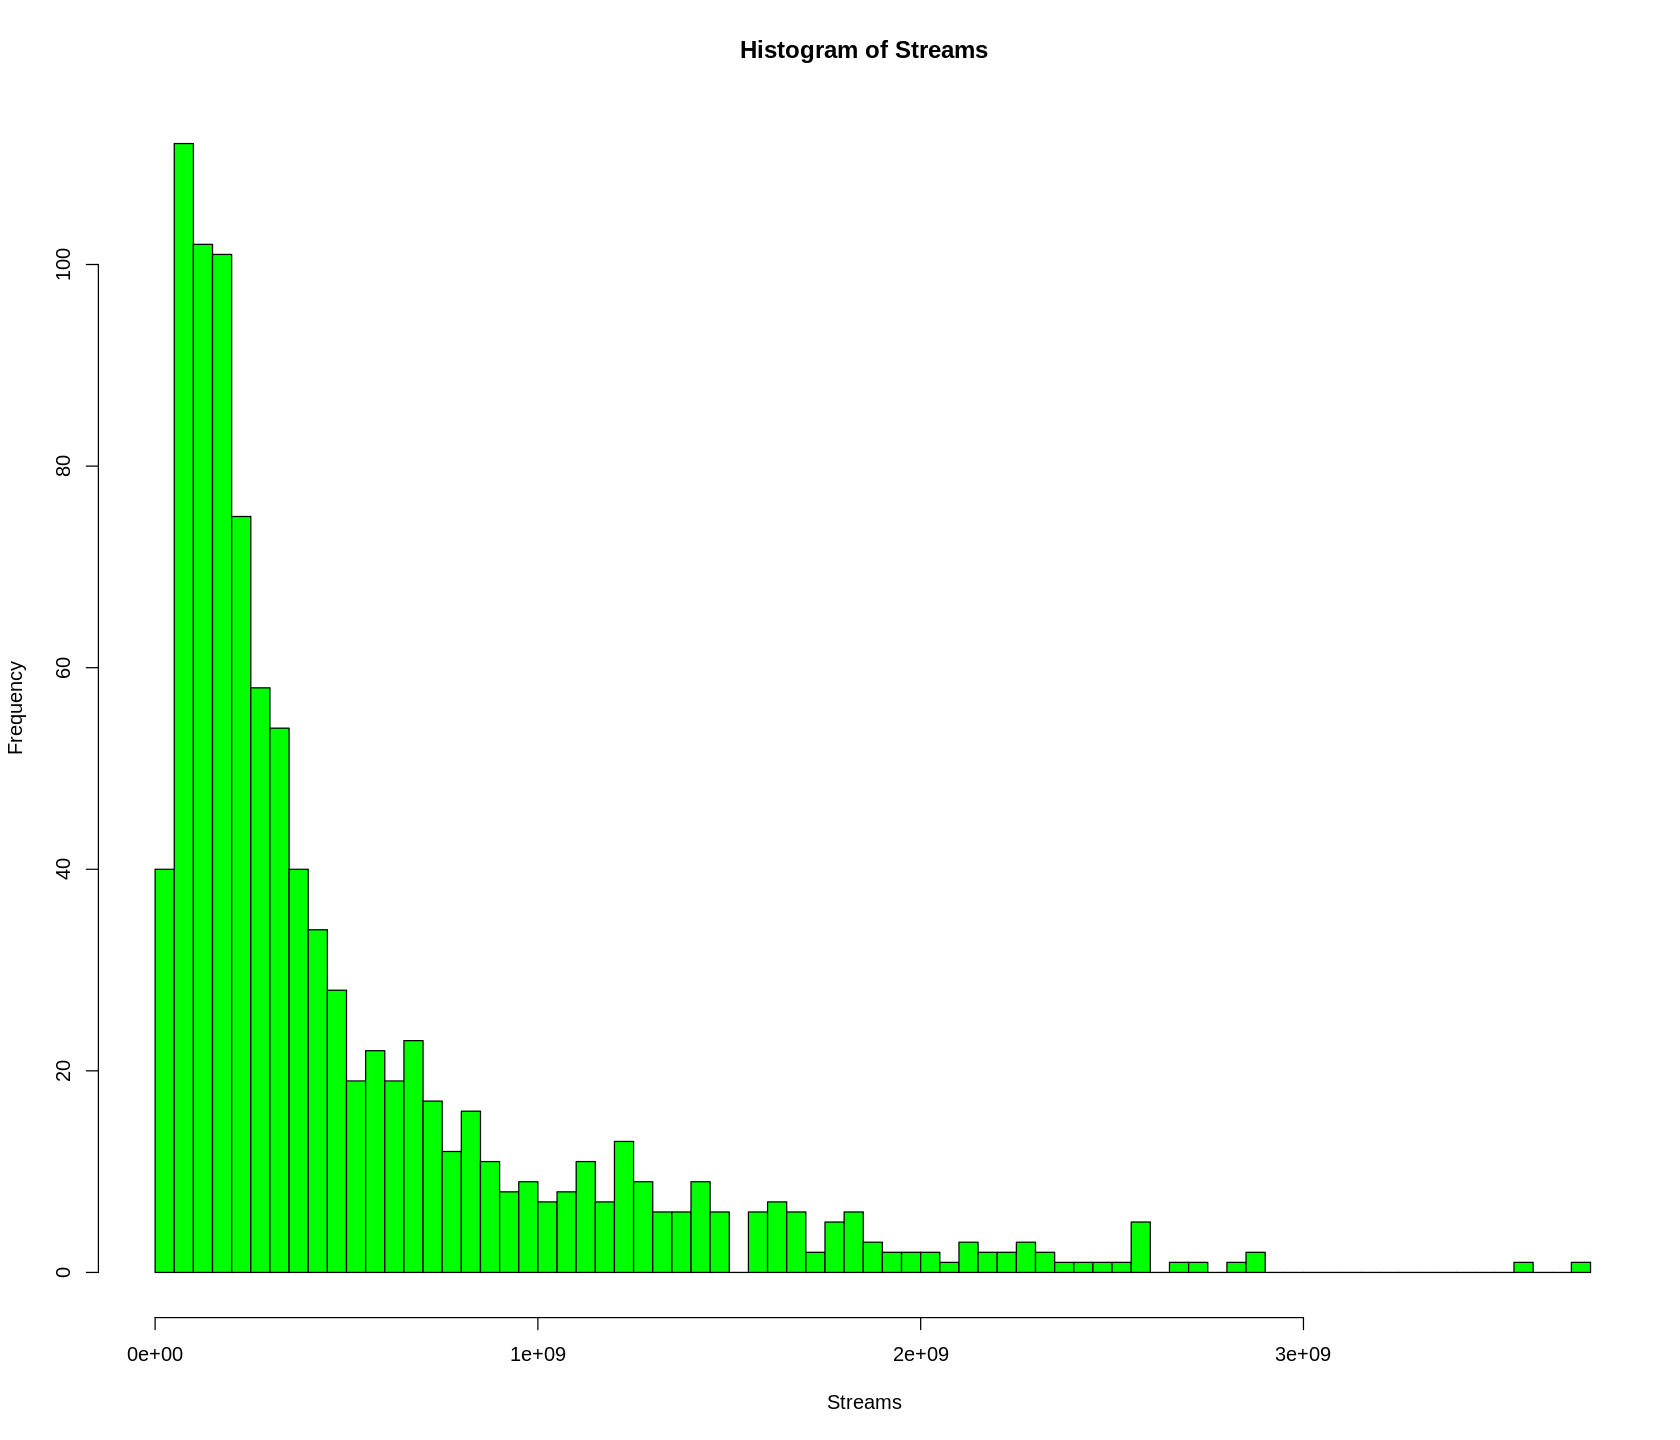

In [93]:
hist(spotify_data_copy$streams,
     breaks = 100,
     col = 'green',
     main = 'Histogram of Streams',
     xlab = 'Streams',
     ylab = 'Frequency',
     xlim = c(0, max(spotify_data_copy$streams, na.rm = TRUE)))

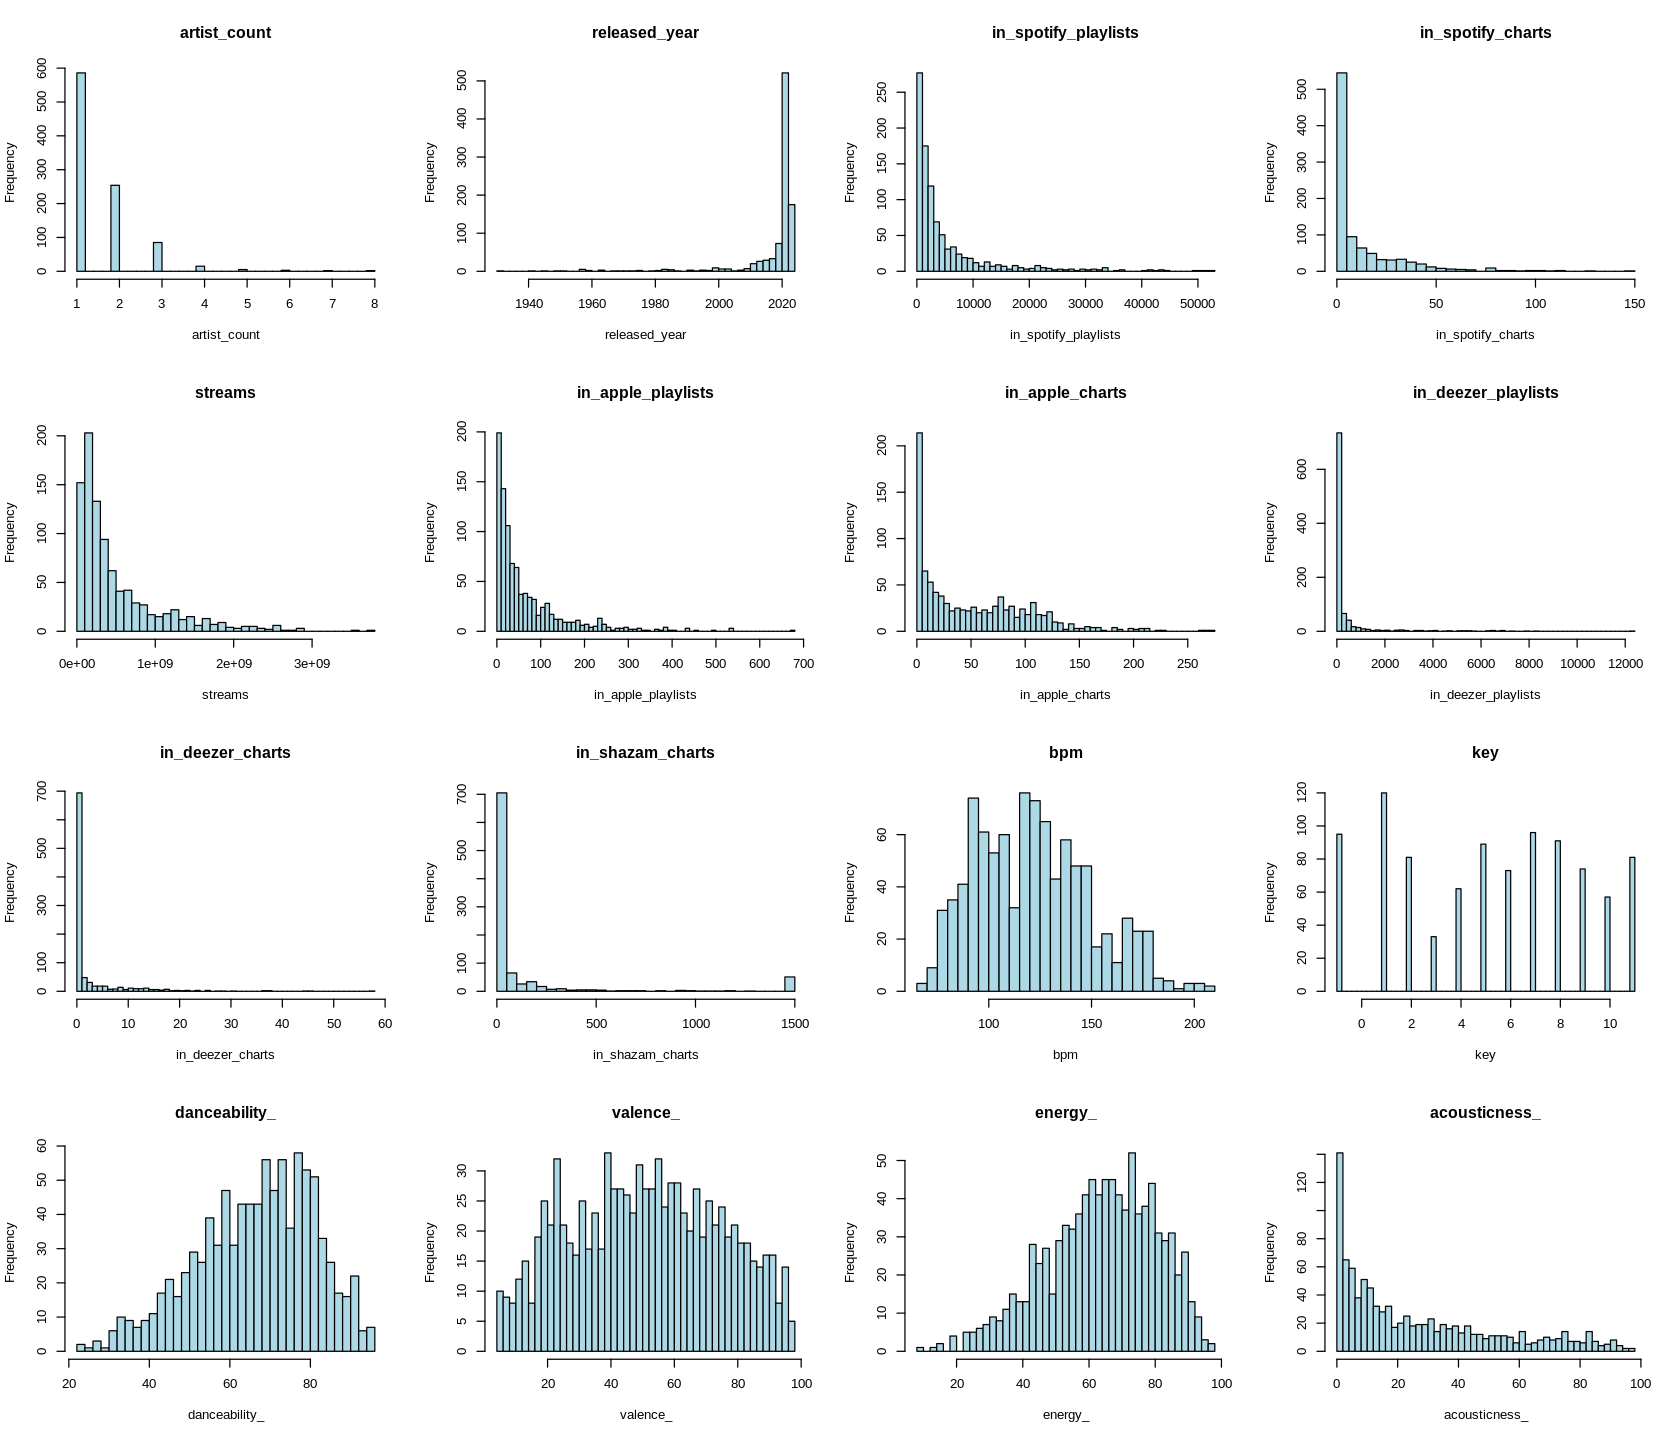

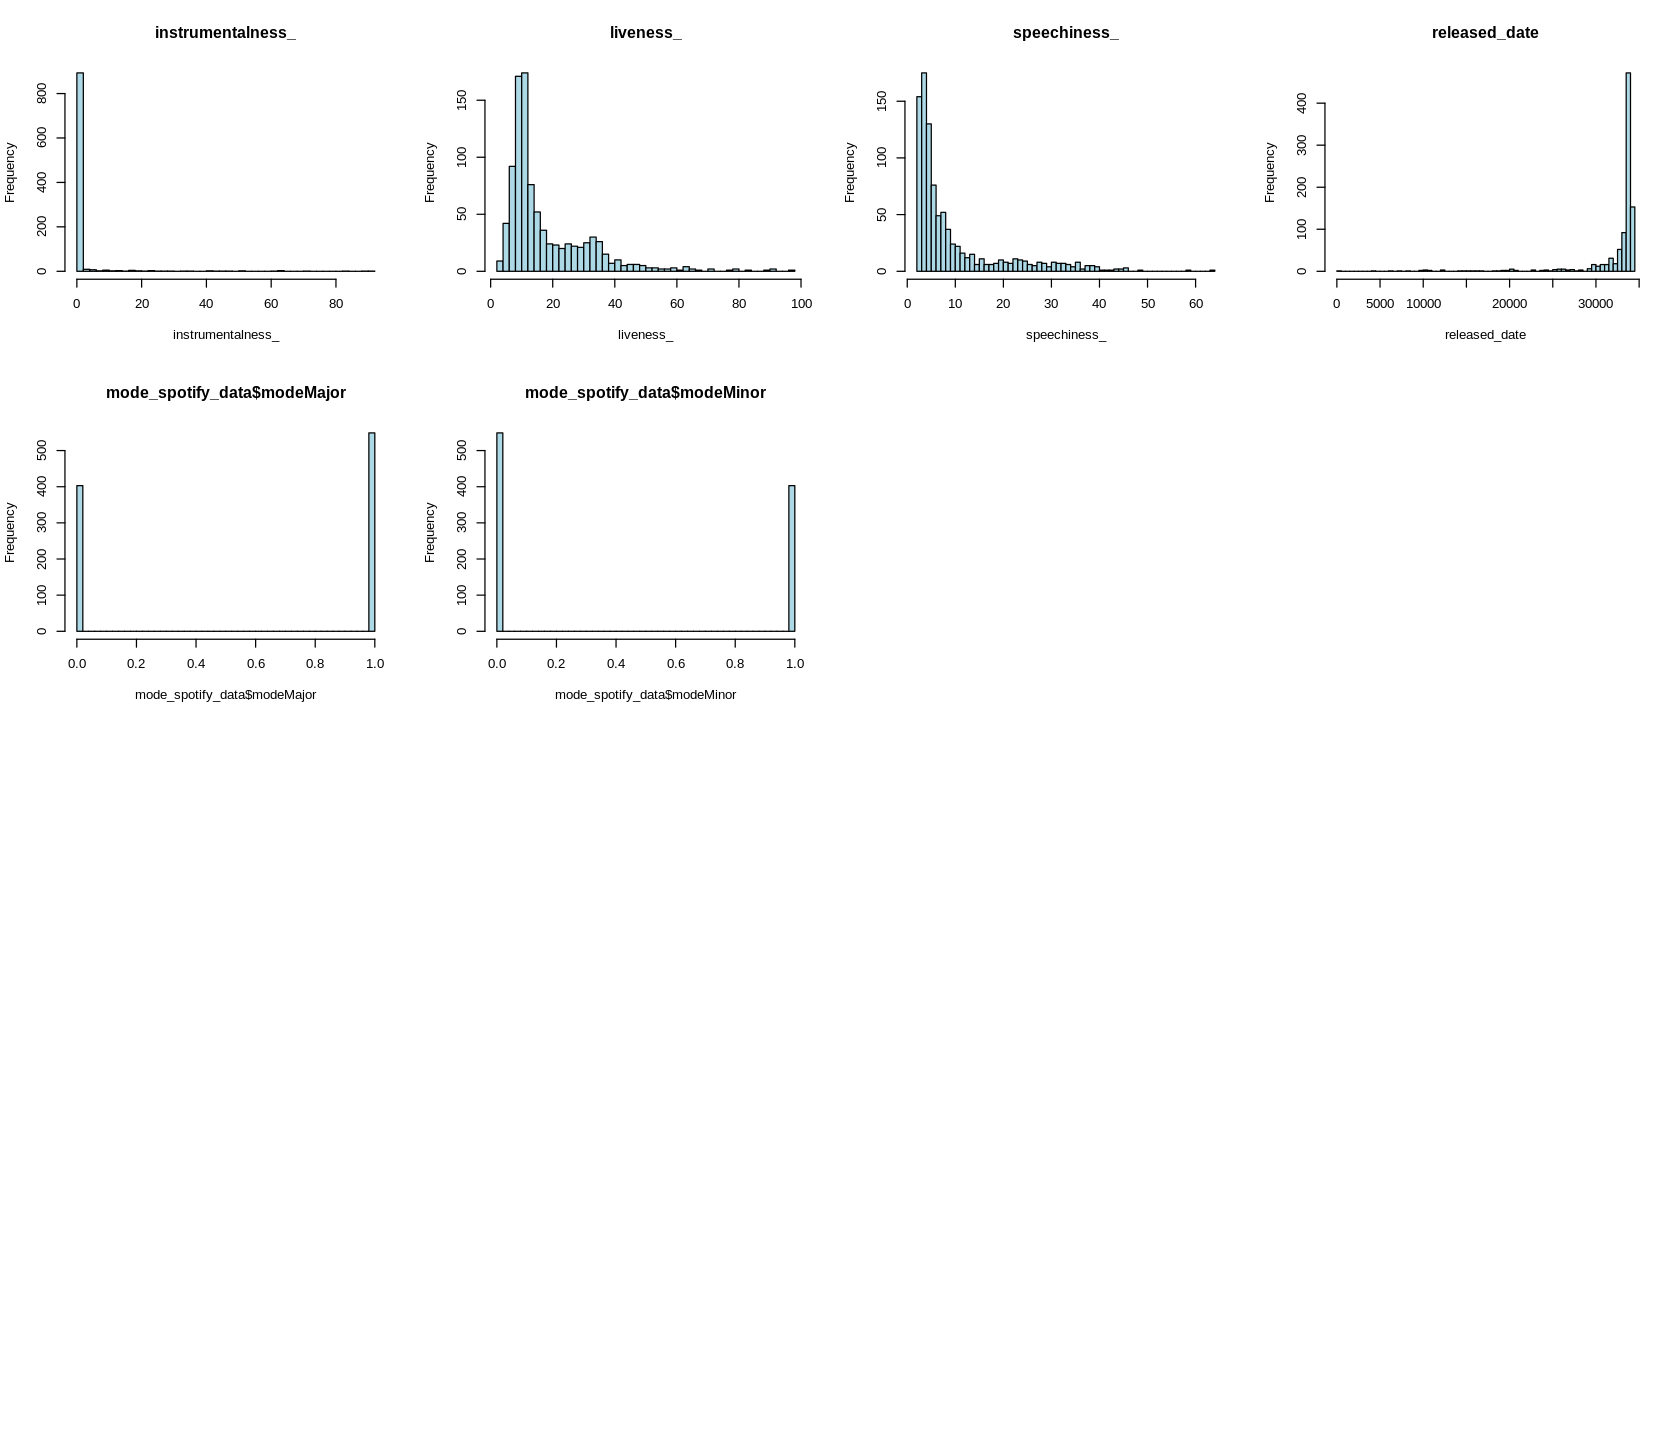

In [94]:
par(mfrow=c(4, 4))

for (col in colnames(spotify_data_copy)) {
  if (is.numeric(spotify_data_copy[[col]])) {
    hist(spotify_data_copy[[col]], main=col, xlab=col, col='lightblue', border='black', breaks=50)
  }
}

par(mfrow=c(1, 1))


In [95]:
#Calculation total playlists and total charts
spotify_data_copy$total_playlist <- rowSums(spotify_data_copy[, c('in_spotify_playlists',
                                                                  'in_apple_playlists',
                                                                  'in_deezer_playlists')])
spotify_data_copy$total_charts <- rowSums(spotify_data_copy[, c('in_spotify_charts',
                                                                'in_apple_charts',
                                                                'in_deezer_charts',
                                                                'in_shazam_charts')])

In [96]:
# Removing those!
columns_to_remove <- c(
  "in_spotify_playlists",
  "in_apple_playlists",
  "in_deezer_playlists",
  "in_spotify_charts",
  "in_apple_charts",
  "in_deezer_charts",
  "in_shazam_charts"
)

spotify_data_copy <- spotify_data_copy[, !(names(spotify_data_copy) %in% columns_to_remove)]


In [97]:
#Fixing size for the plot
options(repr.plot.width=14, repr.plot.height=12)

##STEP-6 HYPOTHESIS 2


Multiple Linear Regression Model(MLR)

In [98]:
X <- spotify_data_copy[, !(names(spotify_data_copy) %in% 'target_variable')]
y <- spotify_data_copy$streams


mlr_model <- lm(y ~ ., data = spotify_data_copy)

summary_model <- summary(mlr_model)

# Extracting  the desired information
coefficients_table <- summary_model$coefficients
significance_codes <- coefficients_table[, "Pr(>|t|)"]
residual_standard_error <- summary_model$sigma
multiple_r_squared <- summary_model$r.squared
adjusted_r_squared <- summary_model$adj.r.squared
f_statistic <- summary_model$fstatistic[1]
p_value <- summary_model$fstatistic[4]

# Printing the extracted information
cat("Signif. codes:", signif(significance_codes), "\n")
cat("Residual standard error:", format(residual_standard_error, scientific = TRUE), "on", summary_model$df[2], "degrees of freedom\n")
cat("Multiple R-squared:", format(multiple_r_squared, scientific = TRUE), "\tAdjusted R-squared:", format(adjusted_r_squared, scientific = TRUE), "\n")
cat("F-statistic:", format(f_statistic, scientific = TRUE), "on", summary_model$df[1], "and", summary_model$df[2], "DF, p-value:", format(p_value, scientific = TRUE), "\n")
print(AIC(mlr_model))

print(paste("Residual Standard Error:", sigma(mlr_model)))



Warning message in summary.lm(mlr_model):
“essentially perfect fit: summary may be unreliable”


Signif. codes: 0.713632 2.42012e-16 0.692038 0 0.117502 0.564777 0.171411 0.261604 0.850544 0.676175 0.89251 0.336448 0.298562 0.414711 0.601053 0.503119 0.471898 
Residual standard error: 6.413855e-08 on 935 degrees of freedom
Multiple R-squared: 1e+00 	Adjusted R-squared: 1e+00 
F-statistic: 4.642685e+33 on 17 and 935 DF, p-value: NA 
[1] -28813.96
[1] "Residual Standard Error: 6.41385464421269e-08"


DEPECTING THE RESULTS VIA GRAPH

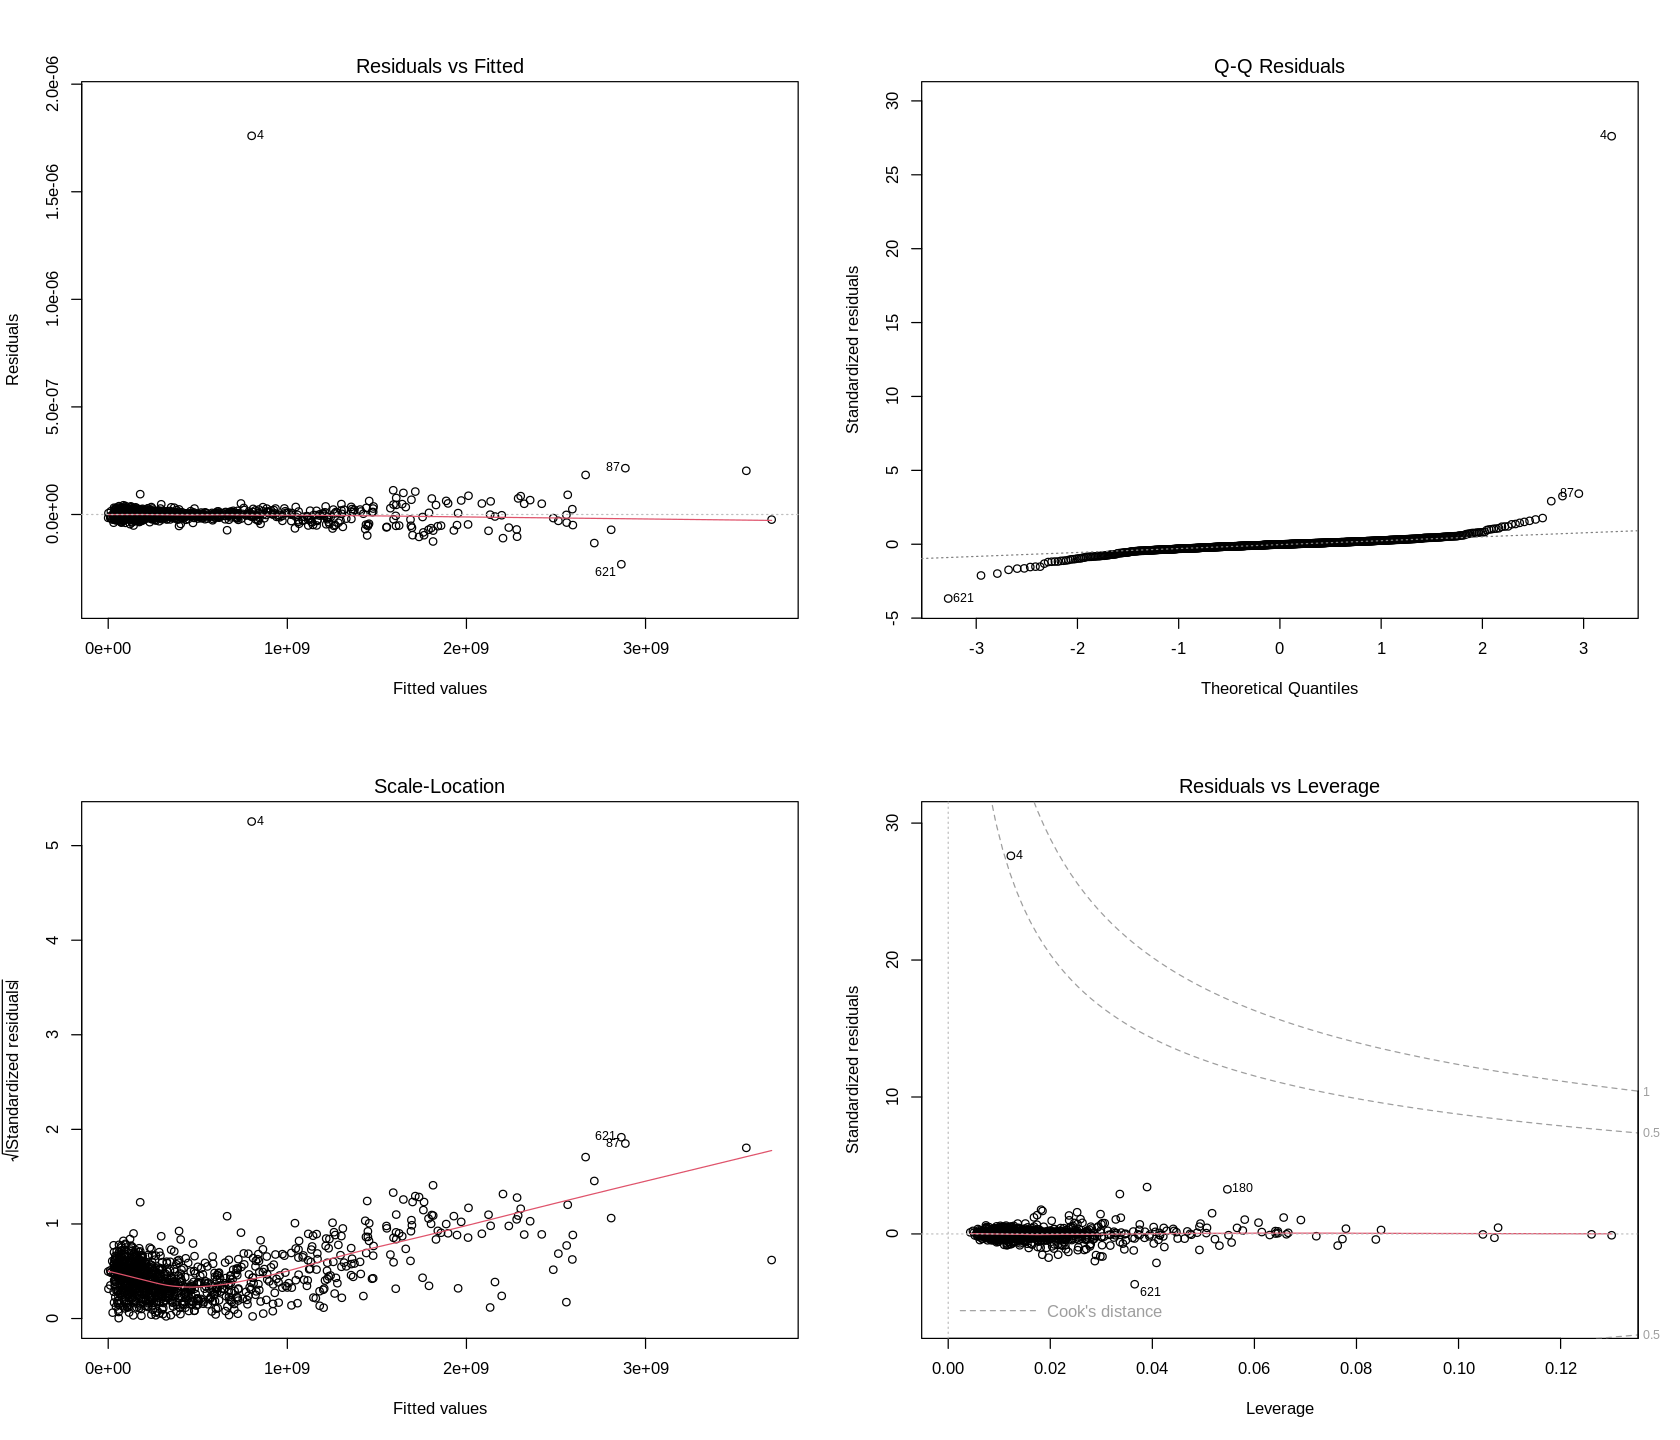

In [99]:
par(mfrow=c(2, 2))
plot(mlr_model)


In [100]:
residuals_mlr_model <- residuals(mlr_model)

# Performing the Shapiro-Wilk test for normality on the residuals
shapiro_test <- shapiro.test(residuals_mlr_model)

print(shapiro_test)

alpha_level <- 0.05
if (shapiro_test$p.value < alpha_level) {
  cat("The p-value is less than", alpha_level, "- reject the null hypothesis; the residuals are not normally distributed.\n")
} else {
  cat("The p-value is greater than", alpha_level, "- fail to reject the null hypothesis; the residuals are normally distributed.\n")
}



	Shapiro-Wilk normality test

data:  residuals_mlr_model
W = 0.24822, p-value < 2.2e-16

The p-value is less than 0.05 - reject the null hypothesis; the residuals are not normally distributed.


##STEP 7:CONCLUSION:
The project's conclusion successfully analyzes Spotify streaming data to show the variety of musical qualities that influence a song's popularity. The model's strong predictive ability was demonstrated by the use of multiple linear regression, which provided a nuanced understanding of the interactions between various factors influencing streams. The dataset's reliability is ensured by the randomness of its missing data, as demonstrated by the results of the Chi-Square and MCAR tests. These technical insights provide practical advice for music industry stakeholders to maximize streaming success in addition to validating the study's methodology.